In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Fields

## Time series
**datetime** - hourly date + timestamp  

## Categorical
**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
**holiday** - whether the day is considered a holiday  
**workingday** - whether the day is neither a weekend nor holiday  
**weather** -  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  

## Numeric
**temp** - temperature in Celsius  
**atemp** - "feels like" temperature in Celsius  
**humidity** - relative humidity  
**windspeed** - wind speed  
**casual** - number of non-registered user rentals initiated  
**registered** - number of registered user rentals initiated  
**count** - number of total rentals (casual + registered)

In [2]:
#Importing the dataset
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Visualize dataset
  * Boxplot and histogram for 'count' column.
  * Scatter the numeric columns with 'count' column.
  * Boxplot the categorical columns with 'count' column.
  * Correlation between each features.

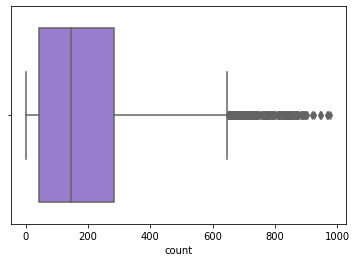

In [7]:
# Boxplot of count
sns.boxplot(x='count', data=train, color='mediumpurple')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


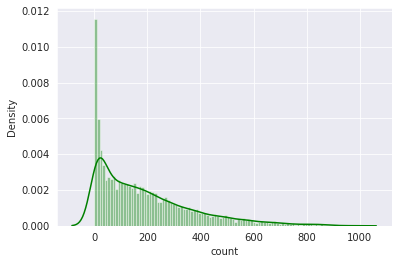

In [8]:
# Histogram of count (It looks skew..)
sns.set_style('darkgrid')
sns.distplot(train['count'], bins=100, color='green')
plt.show()

['temp', 'atemp', 'humidity', 'windspeed']


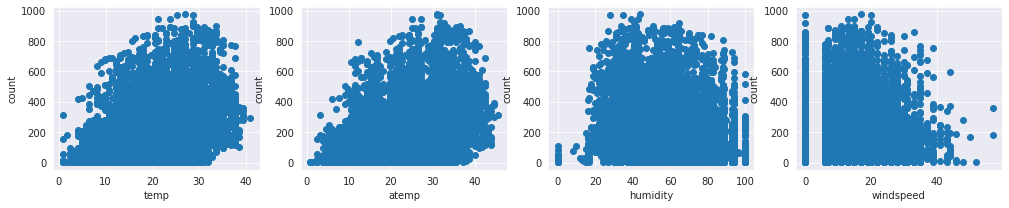

In [9]:
# Scatter plot between count & each numeric features
fields = [f for f in train]
fields = fields[5:-3]
print(fields)

fig = plt.figure(figsize=(17, 3))

for i, f in enumerate(fields):
    ax = fig.add_subplot(1, 4, i+1)
    ax.scatter(train[f], train['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)

plt.show()

# 'temp' and 'atemp' looks similar..

[Text(0.5, 0, 'Weather'), Text(0, 0.5, 'Count')]

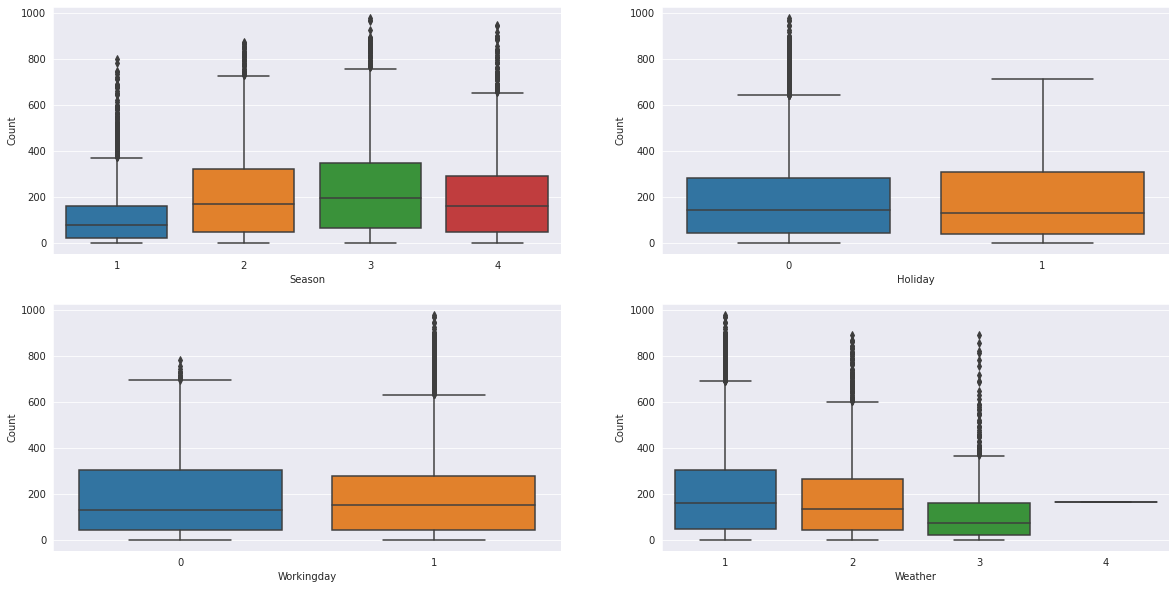

In [10]:
# Boxplot between count & each categorical features
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=train, y="count", x="season", ax=axes[0][0])
sns.boxplot(data=train, y="count", x="holiday", ax=axes[0][1])
sns.boxplot(data=train, y="count", x="workingday", ax=axes[1][0])
sns.boxplot(data=train, y="count", x="weather", ax=axes[1][1])

axes[0][0].set(xlabel='Season', ylabel="Count")
axes[0][1].set(xlabel='Holiday', ylabel='Count')
axes[1][0].set(xlabel='Workingday', ylabel='Count')
axes[1][1].set(xlabel='Weather', ylabel='Count')

<AxesSubplot:>

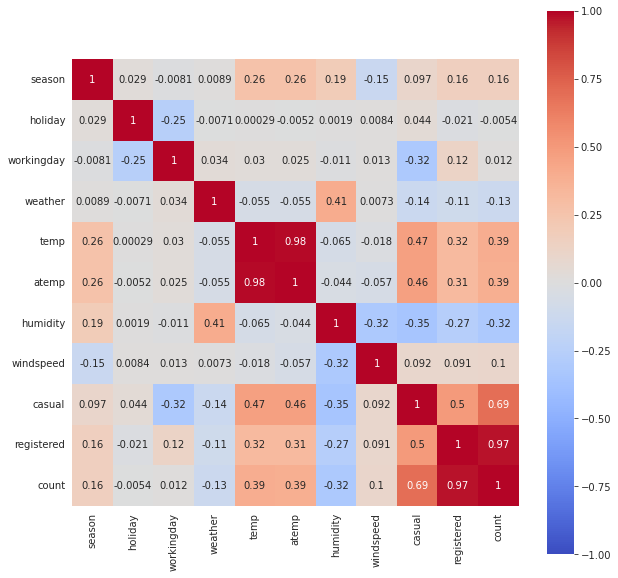

In [11]:
# Correlation between each features
plt.figure(figsize=(10,10))
sns.heatmap(train.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True)

# Data preprocessing
* What we have to do
  - Split 'datetime' column with converting datetime object.
  - Take log for count column to mitigate skew.
  - Eliminate outliers.
  - MinMax scaling the numeric columns.
  - Split data & train set

In [12]:
# Convert datetime column to each elements (year, month, day, dayofweek, hour)
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
def split_datetime(df):
    df['year'] = df['datetime'].apply(lambda t: t.year)
    df['month'] = df['datetime'].apply(lambda t: t.month)
    df['day'] = df['datetime'].apply(lambda t: t.day)
    df['dayofweek'] = df['datetime'].apply(lambda t: t.dayofweek)
    df['hour'] = df['datetime'].apply(lambda t: t.hour)
    df = df.drop(['datetime'], axis=1)
    return df

In [14]:
test = split_datetime(test)
train = split_datetime(train)
train = train.drop(['casual', 'registered'], axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


<AxesSubplot:xlabel='hour', ylabel='count'>

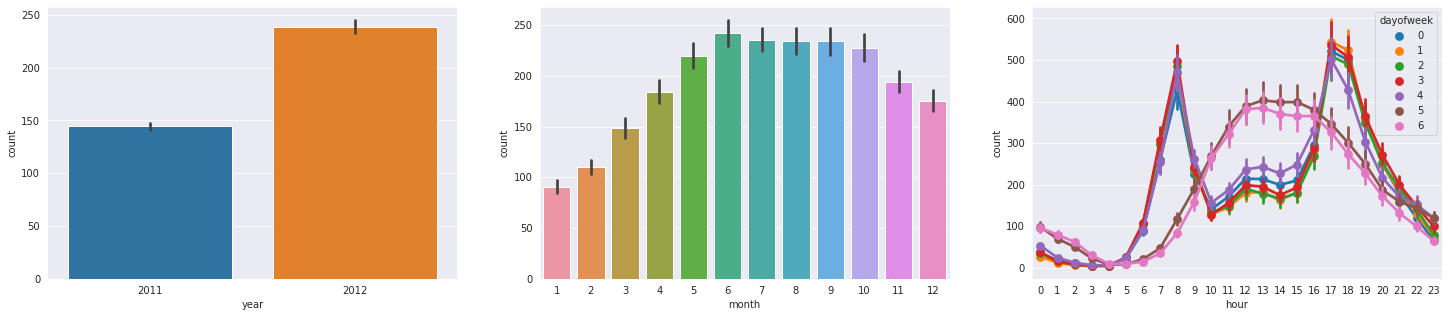

In [15]:
# Boxplot between count & each categorical features
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(25, 5)
sns.barplot(data=train, x='year', y=train['count'], ax=axes[0])
sns.barplot(data=train, x='month', y=train['count'], ax=axes[1])
sns.pointplot(data=train, x='hour', y=train['count'], ax=axes[2], hue='dayofweek')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

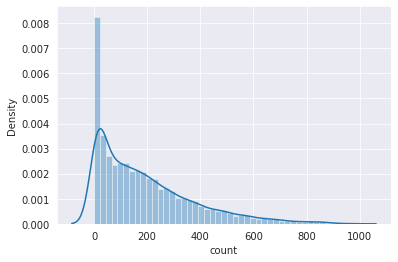

In [16]:
# Count column looks skew.
sns.distplot(train['count'])

In [17]:
# Take a log for count column
train['count'] = np.log1p(train['count'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

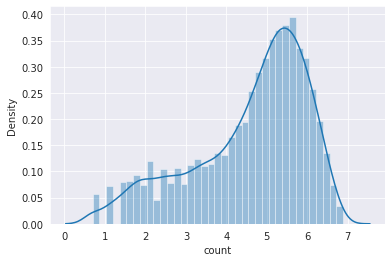

In [18]:
sns.distplot(train['count'])

In [19]:
# Eliminate outliers (with residual less than stdev*3)
train = train[np.abs(train['count']-train['count'].mean()) <= (3*train['count'].std())]

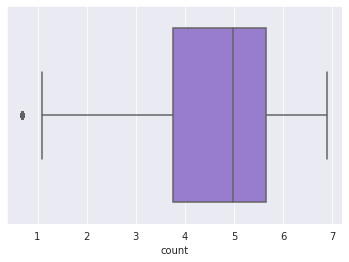

In [20]:
# Boxplot of count
sns.boxplot(x='count', data=train, color='mediumpurple')
plt.show()

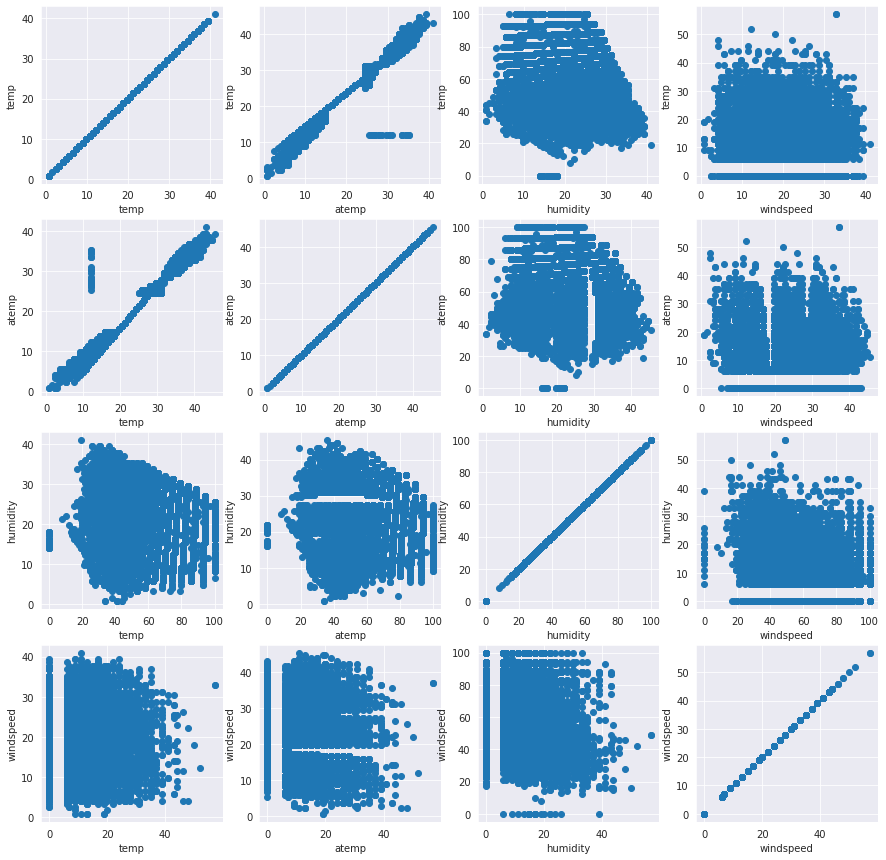

In [21]:
# Eliminate outliers (between correlation)
fig = plt.figure(figsize=(15, 15))
for i, f1 in enumerate(fields):
    for j, f2 in enumerate(fields):
        idx = i*len(fields)+j+1
        ax = fig.add_subplot(len(fields), len(fields), idx)
        ax.scatter(train[f1], train[f2])
        ax.set_ylabel(f1)
        ax.set_xlabel(f2)
plt.show()

In [22]:
drop_idx = train[(train['atemp'] > 20) & (train['atemp'] < 40) & (train['temp'] > 10) & (train['temp'] < 20)].index
train = train.drop(drop_idx)

In [23]:
# Standard Scaling numeric columns
from sklearn.preprocessing import MinMaxScaler

def scaling(df):
    scaler = MinMaxScaler()
    num_cols = ['temp', 'atemp', 'humidity', 'windspeed']
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

In [24]:
train = scaling(train)
test = scaling(test)

In [25]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.224490,0.305068,0.81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,0.204082,0.288064,0.80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,0.204082,0.288064,0.80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,0.224490,0.305068,0.75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,0.224490,0.305068,0.75,0.0,0.693147,2011,1,1,5,4


In [26]:
# Split train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop(['count'], axis=1), train['count'], test_size=0.3)

# Define metric (RMSLE)

In [27]:
"""
np.log1p(x) : log0은 무한대로 발산하기 때문에 x값에다가 1을 더한다.
np.expm1() : 1빼줘야 원래대로 환원
"""
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# Model selection

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [29]:
def evaluate(reg_cls, params=None):
    reg = reg_cls()
    if params:
        reg = GridSearchCV(reg, param_grid=params, refit=True)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    y_test_exp = np.expm1(y_test)
    pred_exp = np.expm1(pred)
    print('\n', reg_cls)
    if params:
        print(reg.best_params_)
        reg = reg.best_estimator_
    print(rmsle(y_test_exp, pred_exp))
    return reg, pred_exp

In [30]:
lr_reg, pred_lr = evaluate(LinearRegression)
rg_reg, pred_rg = evaluate(Ridge)
ls_reg, pred_ls = evaluate(Lasso)
rf_reg, pred_rf = evaluate(RandomForestRegressor)
gb_reg, pred_gb = evaluate(GradientBoostingRegressor)
xg_reg, pred_xg = evaluate(XGBRegressor)
lg_reg, pred_lg = evaluate(LGBMRegressor)

params = {'n_estimators': [100*i for i in range(1, 6)]}
xg_reg, pred_xg = evaluate(XGBRegressor, params)
lg_reg, pred_lg = evaluate(LGBMRegressor, params)


 <class 'sklearn.linear_model._base.LinearRegression'>
0.9950776285478549

 <class 'sklearn.linear_model._ridge.Ridge'>
0.994948310430518

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.1530650838288912

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.2966240585367432

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.3579834997197787

 <class 'xgboost.sklearn.XGBRegressor'>
0.27981505471296686

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.2732750277689101

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 100}
0.27981505471296686

 <class 'lightgbm.sklearn.LGBMRegressor'>
{'n_estimators': 500}
0.26524805684343267


In [31]:
def feature_importances(reg):
    plt.figure(figsize=(20, 10))
    print(type(reg))
    df = pd.DataFrame(sorted(zip(X_train.columns, reg.feature_importances_)), columns=['Feature', 'Value'])
    sns.barplot(x="Value", y="Feature", data=df.sort_values(by="Value", ascending=False))
    plt.show()

<class 'xgboost.sklearn.XGBRegressor'>


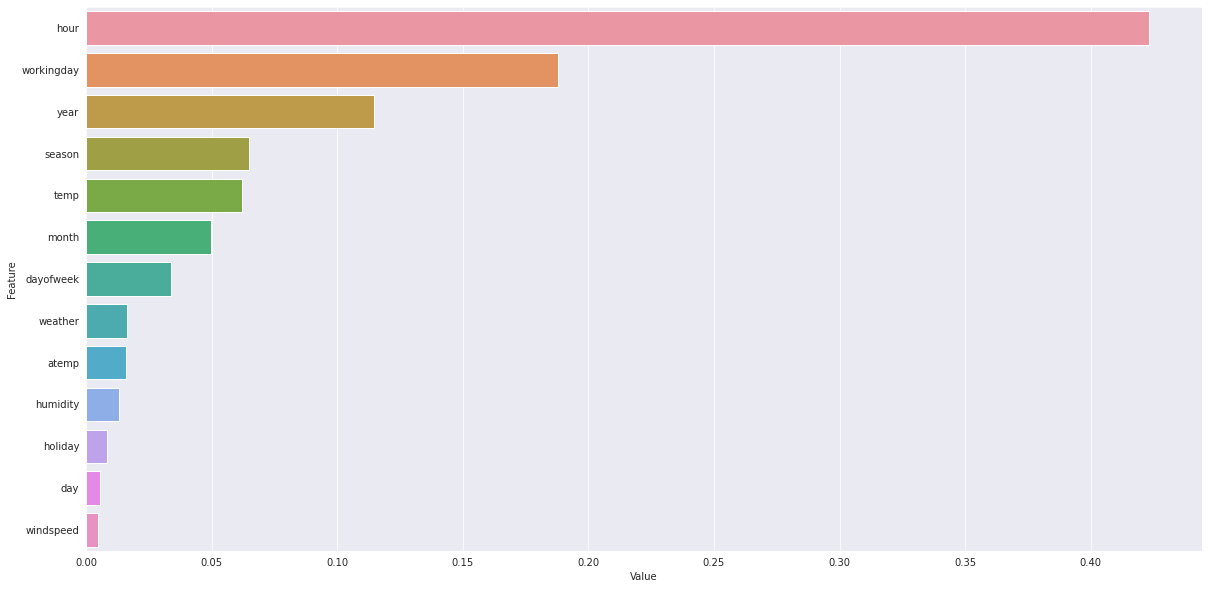

In [32]:
feature_importances(xg_reg)

<class 'lightgbm.sklearn.LGBMRegressor'>


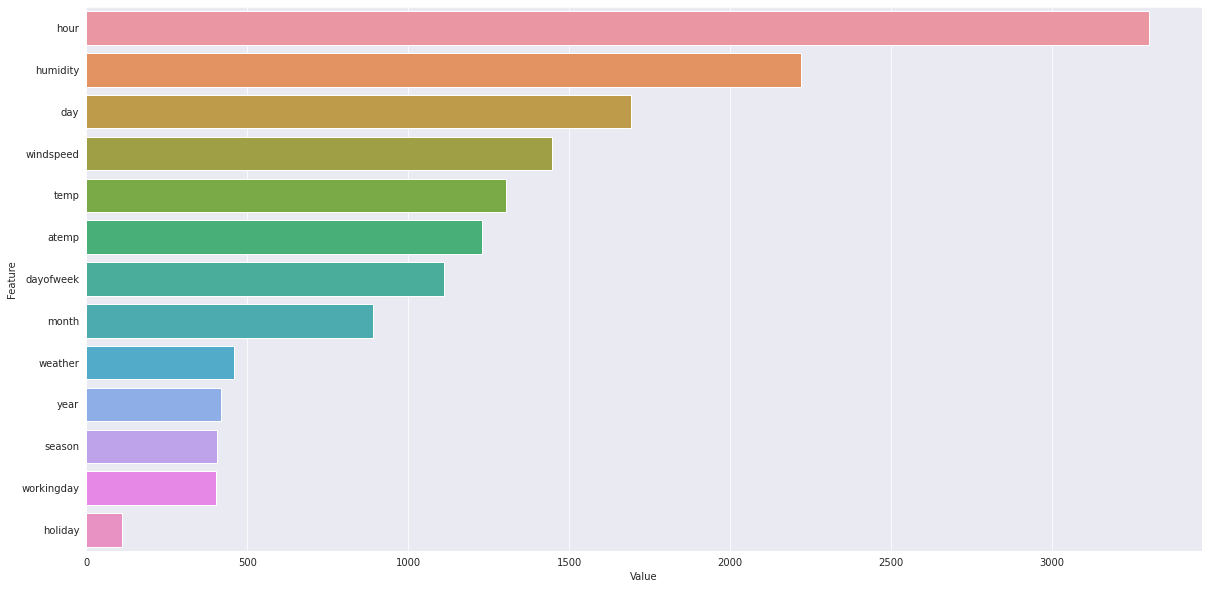

In [33]:
# LightGBMRegressor feature importances
feature_importances(lg_reg)

# Submission

In [34]:
submission = pd.read_csv('../input/bike-sharing-demand/sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [35]:
test.shape

(6493, 13)

In [36]:
# pred = xg_reg.predict(test)
pred = lg_reg.predict(test)
pred_exp = np.expm1(pred)
print(pred_exp)

[  9.10177004   5.45993719   3.4669723  ... 134.57475246  84.71965969
  52.62832544]


In [37]:
submission.loc[:, 'count'] = pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,9.101770
1,2011-01-20 01:00:00,5.459937
2,2011-01-20 02:00:00,3.466972
3,2011-01-20 03:00:00,1.766096
4,2011-01-20 04:00:00,1.734364
...,...,...
6488,2012-12-31 19:00:00,269.901662
6489,2012-12-31 20:00:00,183.933281
6490,2012-12-31 21:00:00,134.574752
6491,2012-12-31 22:00:00,84.719660


In [38]:
submission.to_csv('submission.csv', index=False)